# sktime-xai: Forecasting Explanation Demo

This notebook demonstrates how to use `sktime-xai` to explain forecasts generated by sktime models.

In [1]:
import warnings
warnings.filterwarnings('ignore')


import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sktime.datasets import load_airline
from sktime.forecasting.naive import NaiveForecaster
from sktime.forecasting.trend import TrendForecaster

from sktime_xai.forecasting._shap_forecaster import SHAPForecastExplainer

## 1. Load Data & Train Model

In [2]:
y = load_airline()
y_train = y[:-12]
y_test = y[-12:]

print(f"Train shape: {y_train.shape}, Test shape: {y_test.shape}")

# Simple trend forecaster
forecaster = TrendForecaster()
forecaster.fit(y_train)

Train shape: (132,), Test shape: (12,)


TrendForecaster()

## 2. Explain a Forecast
We want to explain why the model predicts a certain value for the first step of the test set.
We feed the last 24 months of training data as the context window.

100%|██████████| 1/1 [00:00<00:00,  1.45it/s]


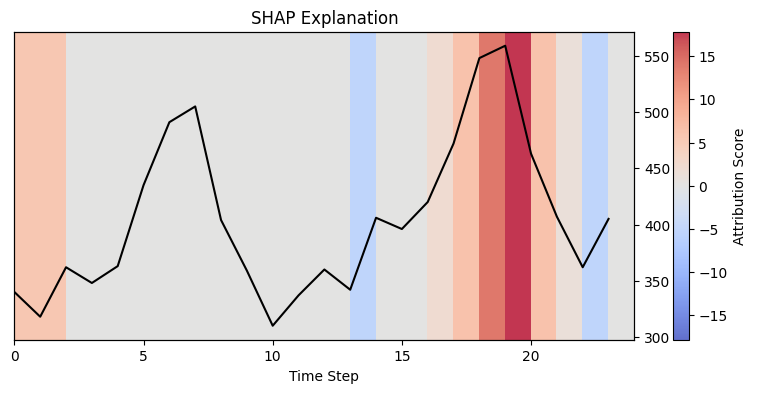

In [3]:
# The context window to explain
y_context = y_train[-24:]

# initialize explainer
explainer = SHAPForecastExplainer(forecaster)
explainer.fit(y_train) # Initialize background

# Explain prediction at fh=1 (next step)
result = explainer.explain(y_context, fh=1)

# Plot
fig = result.plot()
plt.show()